In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
%matplotlib inline

In [2]:
data = pd.read_csv("weights_heights.csv", index_col="Index")

In [3]:
print(data.head())

         Height    Weight
Index                    
1      65.78331  112.9925
2      71.51521  136.4873
3      69.39874  153.0269
4      68.21660  142.3354
5      67.78781  144.2971


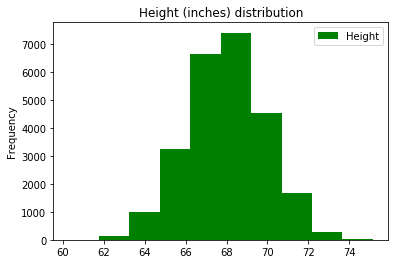

In [4]:
data.plot(y="Height", kind="hist", color="green", title="Height (inches) distribution")

In [5]:
def make_bmi(height_inch, weight_pound):
    meter_to_inch, kilo_to_pound = 39.37, 2.20462
    return (weight_pound / kilo_to_pound) / \
            (height_inch / meter_to_inch) ** 2

In [6]:
data["BMI"] = data.apply(lambda row: make_bmi(row["Height"], row["Weight"]), axis=1)

In [7]:
print(data.head())

         Height    Weight        BMI
Index                               
1      65.78331  112.9925  18.357573
2      71.51521  136.4873  18.762577
3      69.39874  153.0269  22.338895
4      68.21660  142.3354  21.504526
5      67.78781  144.2971  22.077581


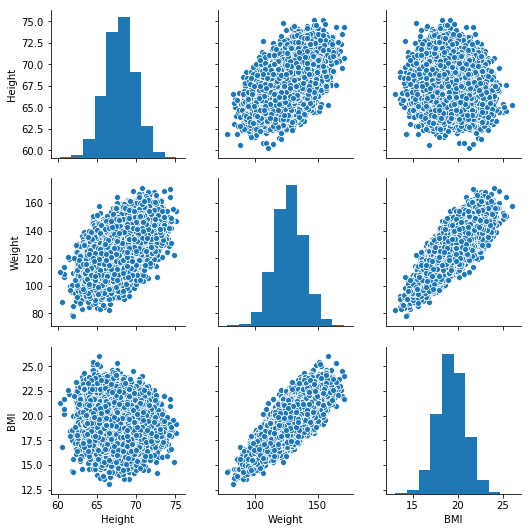

In [8]:
sns.pairplot(data)

In [9]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2

In [10]:
data["Weight category"] = data["Weight"].apply(weight_category)

In [11]:
print(data.head())

         Height    Weight        BMI  Weight category
Index                                                
1      65.78331  112.9925  18.357573                1
2      71.51521  136.4873  18.762577                2
3      69.39874  153.0269  22.338895                3
4      68.21660  142.3354  21.504526                2
5      67.78781  144.2971  22.077581                2


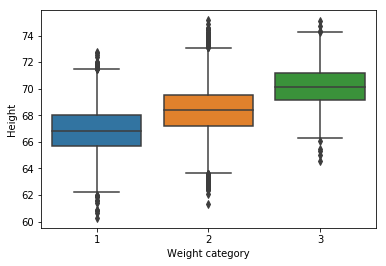

In [12]:
sns.boxplot(x=data["Weight category"], y=data["Height"])

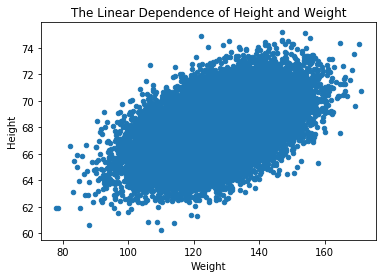

In [13]:
data.plot.scatter(x="Weight", y="Height", title="The Linear Dependence of Height and Weight")

In [35]:
def error(w1, w0, data):
    sum = 0
    for _, row in data.iterrows():
        sum += (row["Height"] - (w0 + w1 * row["Weight"])) ** 2
    return sum

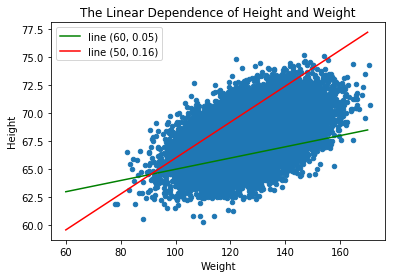

In [36]:
def y1(x):
    return 60 + 0.05 * x

def y2(x):
    return 50 + 0.16 * x

x = np.linspace(60, 170)
data.plot.scatter(x="Weight", y="Height", title="The Linear Dependence of Height and Weight")
plt.plot(x, y1(x), color="green")
plt.plot(x, y2(x), color="red")
plt.legend(("line (60, 0.05)", "line (50, 0.16)"))

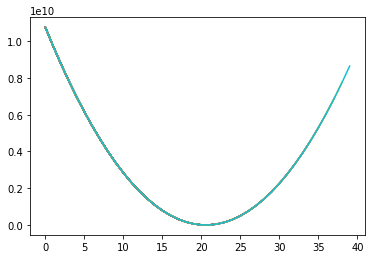

In [38]:
w0 = 50
error_graph = []
for w1 in np.arange(-5.0, 5.0, 0.25):
    error_graph.append(error(w1, w0, data))
    plt.plot(error_graph)

     fun: 79512.21728699486
    nfev: 9
     nit: 5
 success: True
       x: 0.14109203728834385


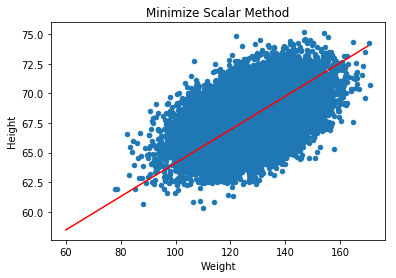

In [39]:
w0 = 50
w1_opt = minimize_scalar(error, bounds=(-5.0, 5.0), args=(w0, data))
print(w1_opt)

def y(x):
    w0 = 50
    return w0 + w1_opt.x * x

x = np.linspace(60, 170)
data.plot.scatter(x="Weight", y="Height", title="Minimize Scalar Method")
plt.plot(x, y(x), color="red")

In [40]:
from mpl_toolkits.mplot3d import Axes3D

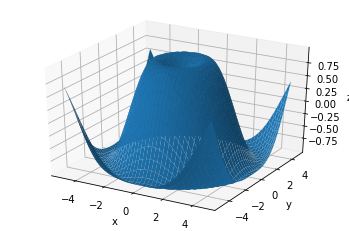

In [42]:
fig = plt.figure() # Making a picture object
ax = fig.gca(projection="3d") # Get current axis

x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
x, y = np.meshgrid(x, y) # Making the coordinates matrix
z = np.sin(np.sqrt(x ** 2 + y ** 2)) # Making a function

surface = ax.plot_surface(x, y, z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

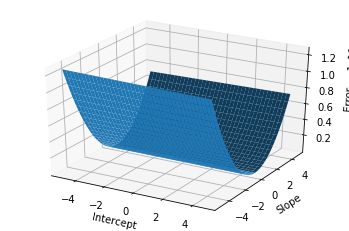

In [54]:
fig = plt.figure()
ax = fig.gca(projection="3d")

w1 = np.arange(-5, 5, 0.25)
w0 = np.arange(-5, 5, 0.25)
w1, w0 = np.meshgrid(w1,w0)
z = error(w1, w0, data)

surface = ax.plot_surface(w0, w1, z)
ax.set_xlabel("Intercept")
ax.set_ylabel("Slope")
ax.set_zlabel("Error")
plt.show()

In [66]:
def yyy(w):
    return error(w[1], w[0],data)
    
w_opt = minimize(yyy, [0.0, 0.0], method='L-BFGS-B', bounds=([-100, 100], [-5, 5]))
print (w_opt)

      fun: 67545.28708529084
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.04802132, -0.93132257])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 12
   status: 0
  success: True
        x: array([57.57171454,  0.08200697])


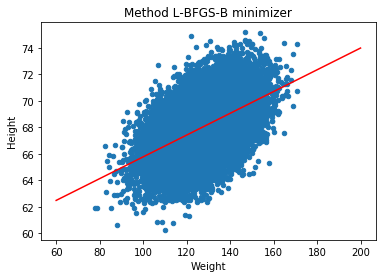

In [67]:
w0_opt = w_opt.x[0]
w1_opt = w_opt.x[1]

def y(x):
    return w0_opt + w1_opt * x

x = np.linspace(60, 200)
data.plot.scatter(x="Weight", y="Height", title="Method L-BFGS-B minimizer")
plt.plot(x, y(x), color="red")